In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [22]:
full_data = pd.read_csv('amazon.csv')
full_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [23]:
full_data.shape

(1465, 16)

In [24]:
columns_to_drop = [
    'product_name', 'category', 'discounted_price', 'actual_price',
    'discount_percentage', 'about_product', 'user_name', 'review_id',
    'review_title', 'review_content', 'img_link', 'product_link',
    'rating_count'
]

data = full_data.drop(columns=columns_to_drop)
data.head()

,product_id,rating,user_id
0,B07JW9H4J1,4.2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,4.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,3.9,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,4.2,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,4.2,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


In [25]:
data.shape

(1465, 3)

# Check the distribution of the rating

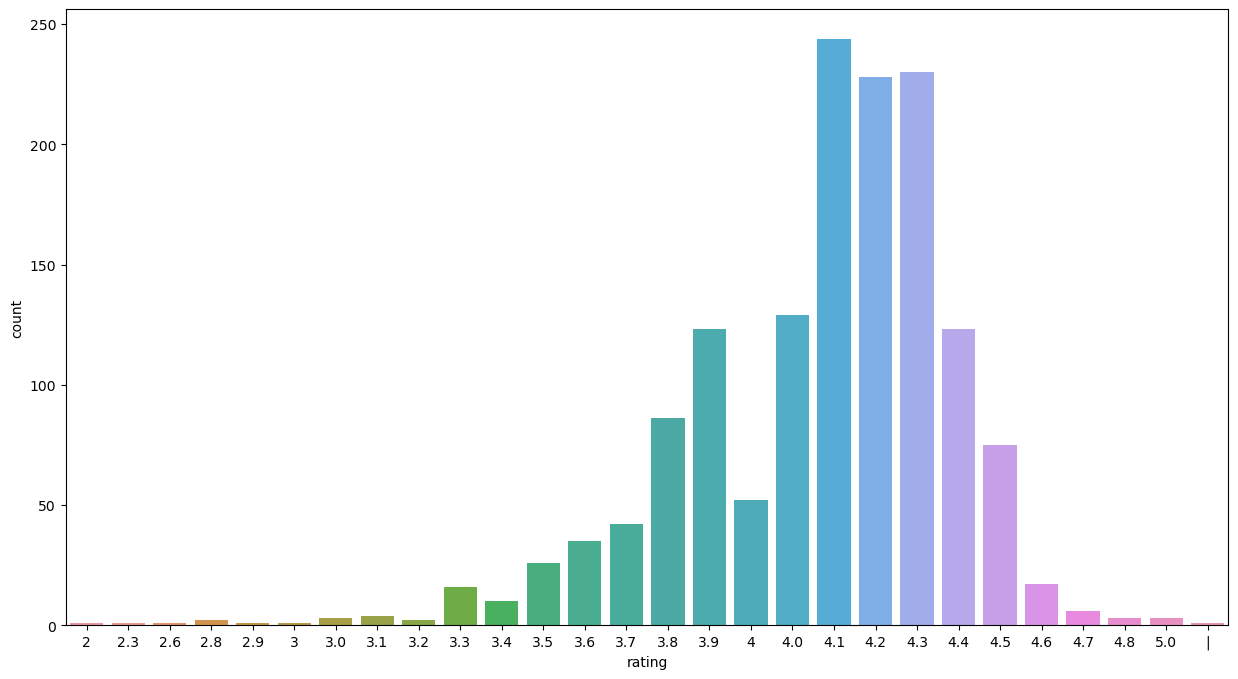

In [26]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data.sort_values(by='rating'), x='rating')
plt.show()

In [27]:

data = data.dropna()
data = data[data.rating != '|']

In [28]:
product_id_encoder = LabelEncoder()
user_id_encoder = LabelEncoder()

In [29]:
data.product_id = product_id_encoder.fit_transform(data.product_id)
data.user_id = user_id_encoder.fit_transform(data.user_id)

In [30]:
data

,product_id,rating,user_id
0,346,4.2,623
1,847,4.0,88
2,818,3.9,848
3,643,4.2,254
4,588,4.2,17
...,...,...,...
1460,672,4,1049
1461,201,4.1,425
1462,27,3.6,864
1463,61,4,300


# Splitting the dataset

In [31]:
Train, Test = train_test_split(data, test_size=0.2, random_state=42)

In [32]:
Train.head()

,product_id,rating,user_id
1331,557,3.9,1188
724,3,4.3,47
254,436,3.6,94
1068,295,3.9,1017
1193,308,3.7,401


In [33]:
Test.head()

,product_id,rating,user_id
1297,236,4.2,1170
175,947,3.7,615
275,955,3.3,220
548,680,4.3,1031
1000,1158,3.9,71


# KNN Model

In [34]:
model = NearestNeighbors(metric='cosine', algorithm='brute')

In [35]:
model.fit(Train)

NearestNeighbors(algorithm='brute', metric='cosine')

In [36]:
distances, indices = model.kneighbors(Train)

In [37]:
distances

array([[0.00000000e+00, 4.30926042e-07, 8.95215081e-07, 1.32507681e-06,
        1.93784945e-06],
       [0.00000000e+00, 2.51480362e-03, 2.51480362e-03, 2.58177817e-03,
        3.03003858e-03],
       [0.00000000e+00, 7.11513843e-06, 9.00041208e-06, 1.27965496e-05,
        1.41199245e-05],
       ...,
       [2.22044605e-16, 2.34822210e-06, 2.86820781e-06, 2.86820781e-06,
        3.44382738e-06],
       [0.00000000e+00, 2.22089835e-06, 6.16072585e-06, 7.03109809e-06,
        1.03239811e-05],
       [2.22044605e-16, 1.27852826e-06, 2.65020043e-06, 3.34687652e-06,
        6.78999487e-06]])

In [38]:
indices

array([[   0,  155,  367,  780,  942],
       [   1,  443,  825, 1154,  814],
       [   2,  951, 1028,  471,   90],
       ...,
       [1168,  588,  129,  436,  933],
       [1169, 1112,  392,  398,  739],
       [1170,  664,  994, 1044,  580]])

# Prediction

In [39]:
def get_recommendations_for_product(model, data, product_id, n_recommendations):
    # Find the index of the product_id in the data
    product_index = data.index[data['product_id'] == product_id].tolist()[0]

    # Compute recommendations for the specified product
    distances, indices = model.kneighbors(data.iloc[product_index].values.reshape(1, -1))

    # Print recommendations for the specified product
    print("Recommendations for product:", product_id)
    for j in range(1, n_recommendations + 1):
        try:
            recommended_product_id = data.iloc[indices[0][j], 0]
            distance = distances[0][j]
            print(f"{j}: {recommended_product_id}, with distance of {distance}")
        except IndexError:
            print("No more recommendations")
            break
    print("\n")

In [40]:
get_recommendations_for_product(model, data, 236, 5)

Recommendations for product: 236
1: 280, with distance of 4.5933658191499305e-06
2: 1022, with distance of 5.374133383972968e-06
3: 555, with distance of 6.924141466191358e-06
4: 1203, with distance of 8.768756406096756e-06
No more recommendations




/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [41]:
def get_recommendations_for_product2(model, data, n_recommendations, product_id):
    # Inverse transform the label-encoded product_id to get the original product_id
    original_product_id = product_id_encoder.inverse_transform([product_id])[0]

    # Find the index of the original product_id in the data DataFrame
    product_index = full_data[full_data['product_id'] == original_product_id].index[0]

    # Compute recommendations for the specified product
    distances, indices = model.kneighbors(data.iloc[product_index].values.reshape(1, -1))

    # Print details of recommended products
    print(f"Recommendations for product with original ID {original_product_id}:")
    original=full_data.loc[full_data['product_id'] == original_product_id].iloc[0]
    print(f"   Product Name: {original['product_name']}")
    print(f"   Category: {original['category']}")
    print("\n")
    for j in range(1, n_recommendations + 1):
        try:
            recommended_index = indices[0][j]
            recommended_original_id = product_id_encoder.inverse_transform([recommended_index])[0]
            distance = distances[0][j]
            # Retrieve details of the recommended product from the full_data DataFrame
            recommended_product_details = full_data[full_data['product_id'] == recommended_original_id].iloc[0]
            print(f"{j}: Product ID: {recommended_original_id}, Distance: {distance}")
            # You can also print additional details of the recommended product
            print(f"   Product Name: {recommended_product_details['product_name']}")
            print(f"   Category: {recommended_product_details['category']}")
            # Add more details as needed
        except:
            print(f"No more recommendations")
            continue
        print("\n")

In [42]:
# Example usage:
get_recommendations_for_product2(model, data, 5, 11)

Recommendations for product with original ID B0085IATT6:
   Product Name: D-Link DIR-615 Wi-fi Ethernet-N300 Single_band 300Mbps Router, Mobile App Support, Router | AP | Repeater | Client Modes(Black)
   Category: Computers&Accessories|NetworkingDevices|Routers


1: Product ID: B09MTLG4TP, Distance: 1.4757618987948362e-06
   Product Name: SAIELLIN Electric Lint Remover for Clothes Fabric Shaver Lint Shaver for Woolen Clothes Blanket Jackets Stainless Steel Blades, Clothes and Furniture Lint Roller for Fabrics Portable Lint Shavers (White Orange)
   Category: Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|LintShavers


2: Product ID: B08CTQP51L, Distance: 2.476176240273631e-06
   Product Name: Robustrion [Anti-Scratch] & [Smudge Proof] [S Pen Compatible] Premium Tempered Glass Screen Protector for Samsung Tab S6 Lite 10.4 inch SM-P610/615 [Bubble Free]
   Category: Computers&Accessories|Accessories&Peripherals|TabletAccessories|ScreenProtectors



/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [43]:
import pickle

In [44]:
pickle.dump(model,open('model.pkl', 'wb') )

In [45]:
data.to_csv('Test_data.csv')

In [46]:
model = pickle.load(open('model.pkl', 'rb'))

In [47]:
def get_recommendations_with_details(model=model, data=data, n_recommendations=5, product_id=0):
    # Inverse transform the label-encoded product_id to get the original product_id
    original_product_id = product_id_encoder.inverse_transform([product_id])[0]

    # Find the index of the original product_id in the data DataFrame
    product_index = full_data[full_data['product_id'] == original_product_id].index[0]

    # Compute recommendations for the specified product
    distances, indices = model.kneighbors(data.iloc[product_index].values.reshape(1, -1))

    recommendations = []

    for j in range(1, n_recommendations + 1):
        try:
            recommended_index = indices[0][j]
            recommended_original_id = product_id_encoder.inverse_transform([recommended_index])[0]
            distance = distances[0][j]

            # Retrieve details of the recommended product from the full_data DataFrame
            recommended_product_details = full_data[full_data['product_id'] == recommended_original_id].iloc[0]

            recommendation_info = {
                'product_id': recommended_original_id,
                'product_name': recommended_product_details['product_name'],
                'category': recommended_product_details['category'],
                'rating': recommended_product_details['rating'],
                'rating_count': recommended_product_details['rating_count'],
                'img_link': recommended_product_details['img_link'],
                'product_link': recommended_product_details['product_link'],
                'distance': distance
            }

            recommendations.append(recommendation_info)

        except:
            print(f"No more recommendations")
            continue

    return recommendations

In [48]:
data.nunique()

product_id    1350
rating          27
user_id       1193
dtype: int64

In [49]:
full_data.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64